In [6]:
import os, joblib
os.environ["TOKENIZERS_PARALLELISM"] = "false"
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, Bidirectional, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import torch
import torch.distributed as dist 
import torch.multiprocessing as mp
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, DistilBertModel
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F

from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

In [7]:
!ls /kaggle/input/pushto-poetry/data

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


abbasinYousuf	karanKhan	    mumtazOrakazi   salimRiaz
ajmalKhattak	khaliqZiari	    munirJan	    shabbirKhanDurrani
allamaAbdulHai	khatirAfridi	    naeemAhmed	    shakirOrakzai
azizMazerwal	khayyamYousufzai    rabiaMumtaz     shoaibKhanKhattak
ghaniKhan	khushalKhanKhattak  rahmanBaba
hamzaBaba	matiullahTurab	    rehmatShah
javedAhmedzai	mohammadAjanyar     sahibShahSabir


In [8]:
# Define the data directory
DATA_DIR = "/kaggle/input/pushto-poetry/data"

# List of poet names (removed the 5 lowest poets)
poets = [
    "abbasinYousuf", "ajmalKhattak", "allamaAbdulHai", "ghaniKhan", "hamzaBaba",
    "javedAhmedzai", "karanKhan", "khatirAfridi", "khushalKhanKhattak", "matiullahTurab",
    "mumtazOrakazi", "munirJan", "naeemAhmed", "rabiaMumtaz", "rahmanBaba",
    "rehmatShah", "sahibShahSabir", "shabbirKhanDurrani", "shakirOrakzai", "shoaibKhanKhattak"
]

# Create a dictionary for poet labels
poet_labels = {poet: i for i, poet in enumerate(poets)}

# Print the poet labels dictionary
print(poet_labels)

{'abbasinYousuf': 0, 'ajmalKhattak': 1, 'allamaAbdulHai': 2, 'ghaniKhan': 3, 'hamzaBaba': 4, 'javedAhmedzai': 5, 'karanKhan': 6, 'khatirAfridi': 7, 'khushalKhanKhattak': 8, 'matiullahTurab': 9, 'mumtazOrakazi': 10, 'munirJan': 11, 'naeemAhmed': 12, 'rabiaMumtaz': 13, 'rahmanBaba': 14, 'rehmatShah': 15, 'sahibShahSabir': 16, 'shabbirKhanDurrani': 17, 'shakirOrakzai': 18, 'shoaibKhanKhattak': 19}


In [9]:
# Load and Label the Data
def load_and_label(data_dir, poets, poet_labels):
    data = []
    labels = []

    for poet in poets:
        poet_dir = os.path.join(data_dir, poet)
        file_path = os.path.join(poet_dir, f'{poet}.txt')

        # Check if the file exists
        if not os.path.exists(file_path):
            print(f'{file_path} does not exist')
            continue

        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            data.extend(lines)
            labels.extend([poet_labels[poet]] * len(lines))

    df = pd.DataFrame({'text': data, 'label': labels})
    return data, labels, df

In [10]:
data, labels, df = load_and_label(DATA_DIR, poets, poet_labels)
df.describe()

,label
count,54620.000000
mean,8.625265
std,5.352617
min,0.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,19.000000


In [11]:
# # Load model directly
# # Load model directly
# from transformers import AutoTokenizer, AutoModelForMaskedLM

# tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-multilingual-uncased")
# model = AutoModelForMaskedLM.from_pretrained("google-bert/bert-base-multilingual-uncased")
# # # padding token
# # tokenizer.pad_token = tokenizer.eos_token

In [12]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device

In [13]:
# poems_train, poems_temp, lables_train, labels_temp = train_test_split(data, labels, test_size=0.2, random_state=42)
# poems_val, poems_test, labels_val, labels_test = train_test_split(poems_temp, labels_temp, test_size=0.5, random_state=42)

In [14]:
# !ls ../../kaggle/input/bert-embeddings/pytorch/default/1/

In [15]:
# class_labels = sorted(list(set(lables_train)))

# def load_embeddings(prefix, num_embeddings):
#     embeddings = []
#     for i in range(num_embeddings):
#         embedding = torch.load(f'../../kaggle/input/bert-embeddings/pytorch/default/1/models_bert/{prefix}_embedding_{i}.pt')
#         embeddings.append(embedding)
#     return torch.stack(embeddings)

### ------------------------------------------- ###

In [16]:
# train_embeddings = load_embeddings('train', len(poems_train))
# train_embeddings

In [17]:
# val_embeddings = load_embeddings('val', len(poems_val))
# val_embeddings

#### --------------------------------------------------

In [18]:
# test_embeddings = load_embeddings('test', len(poems_test))
# test_embeddings

In [19]:
# import shutil

# # Clear the temporary files
# shutil.rmtree('/tmp/')

In [20]:
# # !pip install -U "huggingface_hub[cli]"
# !huggingface-cli login --token hf_NakqYmfqLjesKvRrezAkcbgVWtYimiyfOWz --add-to-git-credential

# # from huggingface_hub import notebook_login

# # login(token="hf_NakqYmfqLjesKvRrezAkcbgVWtYimiyfOWz", add_to_git_credential=True)



# # from huggingface_hub import login

# # Save the token for both API and Git credential helper
# # login("hf_NakqYmfqLjesKvRrezAkcbgVWtYimiyfOWz")

In [21]:
# !pip install ipywidgets --upgrade
# !pip install --upgrade google-cloud-bigquery google-cloud-storage pandas pydantic


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [23]:
#BERT EMBEDDINGS

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Split the dataset into training and testing sets
poems_train, poems_temp, labels_train, labels_temp = train_test_split(data, labels, test_size=0.2, random_state=42)
poems_val, poems_test, labels_val, labels_test = train_test_split(poems_temp, labels_temp, test_size=0.5, random_state=42)

# Load the tokenizer and model (using DistilBERT)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = DistilBertModel.from_pretrained('distilbert-base-multilingual-cased')
model = model.to(device)


# Save training embeddings
for i, poem_text in enumerate(poems_train):
    # Tokenize and encode the poem
    poem_batch_dict = tokenizer(poem_text, padding=True, truncation=True, return_tensors='pt', max_length=80)
    poem_batch_dict = {key: tensor.to(device) for key, tensor in poem_batch_dict.items()}

    # Generate the embedding
    poem_output = model(**poem_batch_dict)
    poem_embedding = poem_output.last_hidden_state.mean(dim=1).to(device)

    # Save the embedding
    torch.save(poem_embedding, f'train_embedding_{i}.pt')
    # Print progress
    print(f"Training embedding {i + 1}/{len(poems_train)} generated and saved.")

# Save validation embeddings
for i, poem_text in enumerate(poems_val):
    # Tokenize and encode the poem
    poem_batch_dict = tokenizer(poem_text, padding=True, truncation=True, return_tensors='pt', max_length=80)
    poem_batch_dict = {key: tensor.to(device) for key, tensor in poem_batch_dict.items()}

    # Generate the embedding
    poem_output = model(**poem_batch_dict)
    poem_embedding = poem_output.last_hidden_state.mean(dim=1).to(device)

    # Save the embedding
    torch.save(poem_embedding, f'val_embedding_{i}.pt')
    # Print progress
    print(f"Validation embedding {i + 1}/{len(poems_val)} generated and saved.")

# Save test embeddings
for i, poem_text in enumerate(poems_test):
    # Tokenize and encode the poem
    poem_batch_dict = tokenizer(poem_text, padding=True, truncation=True, return_tensors='pt', max_length=80)
    poem_batch_dict = {key: tensor.to(device) for key, tensor in poem_batch_dict.items()}

    # Generate the embedding
    poem_output = model(**poem_batch_dict)
    poem_embedding = poem_output.last_hidden_state.mean(dim=1).to(device)

    # Save the embedding
    torch.save(poem_embedding, f'test_embedding_{i}.pt')
    # Print progress
    print(f"Validation embedding {i + 1}/{len(poems_val)} generated and saved.")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Training embedding 1/43696 generated and saved.
Training embedding 2/43696 generated and saved.
Training embedding 3/43696 generated and saved.
Training embedding 4/43696 generated and saved.
Training embedding 5/43696 generated and saved.
Training embedding 6/43696 generated and saved.
Training embedding 7/43696 generated and saved.
Training embedding 8/43696 generated and saved.
Training embedding 9/43696 generated and saved.
Training embedding 10/43696 generated and saved.
Training embedding 11/43696 generated and saved.
Training embedding 12/43696 generated and saved.
Training embedding 13/43696 generated and saved.
Training embedding 14/43696 generated and saved.
Training embedding 15/43696 generated and saved.
Training embedding 16/43696 generated and saved.
Training embedding 17/43696 generated and saved.
Training embedding 18/43696 generated and saved.
Training embedding 19/43696 generated and saved.
Training embedding 20/43696 generated and saved.
Training embedding 21/43696 g

In [24]:
# Load the saved embeddings
def load_embeddings(prefix, num_embeddings):
    embeddings = []
    for i in range(num_embeddings):
        file_path = f'{prefix}_{i}.pt'
        embedding = torch.load(file_path)  # If needed, add `weights_only=True`
        embeddings.append(embedding)
    return torch.stack(embeddings)

train_embeddings = load_embeddings('train_embedding', len(poems_train))
val_embeddings = load_embeddings('val_embedding', len(poems_val))
test_embeddings = load_embeddings('test_embedding', len(poems_test))

# Convert labels to PyTorch tensors
train_labels = torch.tensor(labels_train)
val_labels = torch.tensor(labels_val)
test_labels = torch.tensor(labels_test)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_train)  # Use train labels here

# Move embeddings to CPU before converting to NumPy
train_embeddings_np = train_embeddings.cpu().detach().numpy()
val_embeddings_np = val_embeddings.cpu().detach().numpy()
test_embeddings_np = test_embeddings.cpu().detach().numpy()

# Move labels to NumPy
labels_train_np = np.array(labels_train)
labels_val_np = np.array(labels_val)
labels_test_np = np.array(labels_test)


/tmp/ipykernel_30/1614795926.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embedding = torch.load(file_path)  # If needed, add `weights_only=True`


Epoch [1/100], Loss: 0.0689, Validation Loss: 2.0771
Epoch [2/100], Loss: 0.0619, Validation Loss: 1.9777
Epoch [3/100], Loss: 0.0595, Validation Loss: 1.9309
Epoch [4/100], Loss: 0.0579, Validation Loss: 1.9136
Epoch [5/100], Loss: 0.0569, Validation Loss: 1.8877
Epoch [6/100], Loss: 0.0560, Validation Loss: 1.8710
Epoch [7/100], Loss: 0.0553, Validation Loss: 1.8576
Epoch [8/100], Loss: 0.0548, Validation Loss: 1.8395
Epoch [9/100], Loss: 0.0543, Validation Loss: 1.8341
Epoch [10/100], Loss: 0.0539, Validation Loss: 1.8197
Epoch [11/100], Loss: 0.0535, Validation Loss: 1.8189
Epoch [12/100], Loss: 0.0531, Validation Loss: 1.8163
Epoch [13/100], Loss: 0.0528, Validation Loss: 1.8126
Epoch [14/100], Loss: 0.0526, Validation Loss: 1.8058
Epoch [15/100], Loss: 0.0524, Validation Loss: 1.7973
Epoch [16/100], Loss: 0.0521, Validation Loss: 1.7910
Epoch [17/100], Loss: 0.0519, Validation Loss: 1.7952
Epoch [18/100], Loss: 0.0517, Validation Loss: 1.7929
Epoch [19/100], Loss: 0.0515, Validat

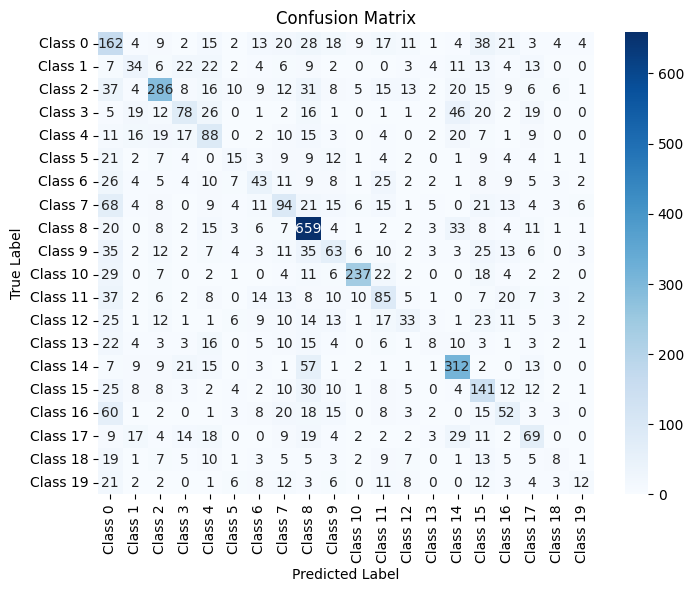

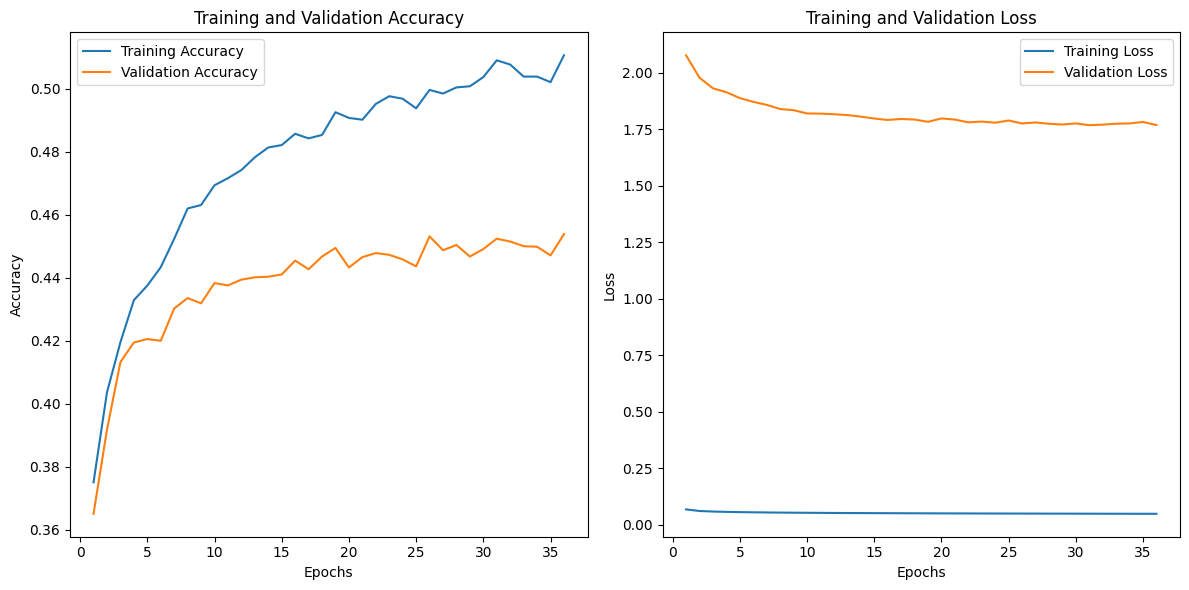

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define PoemClassifier
class PoemClassifier(nn.Module):
    def __init__(self, input_size, output_size):
        super(PoemClassifier, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten
        x = F.relu(x)
        x = self.fc(x)
        return x

# Set input size
input_size = train_embeddings.size(2)  # Use the embedding size
output_size = len(set(labels))  # Number of unique labels

# Initialize classifier
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
classifier = PoemClassifier(input_size, output_size).to(device)

# Optimizer and loss function
optimizer = optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# DataLoader for training
train_dataset = TensorDataset(train_embeddings, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop with early stopping
num_epochs = 100
patience = 5
best_val_loss = float('inf')
counter = 0

train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    classifier.train()
    epoch_loss = 0

    for batch_embeddings, batch_labels in train_loader:
        batch_embeddings, batch_labels = batch_embeddings.to(device), batch_labels.to(device)

        # Forward pass
        outputs = classifier(batch_embeddings)
        loss = criterion(outputs, batch_labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Average training loss
    avg_epoch_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_epoch_loss)

    # Training accuracy
    with torch.no_grad():
        classifier.eval()
        train_outputs = classifier(train_embeddings.to(device))
        train_probabilities = F.softmax(train_outputs, dim=1)
        train_predicted_labels = torch.argmax(train_probabilities, dim=1)
        train_accuracy = accuracy_score(train_labels.cpu(), train_predicted_labels.cpu())
        train_accuracies.append(train_accuracy)

    # Validation accuracy and loss
    with torch.no_grad():
        val_outputs = classifier(val_embeddings.to(device))
        val_loss = criterion(val_outputs, val_labels.to(device))
        val_losses.append(val_loss.item())

        val_probabilities = F.softmax(val_outputs, dim=1)
        val_predicted_labels = torch.argmax(val_probabilities, dim=1)
        val_accuracy = accuracy_score(val_labels.cpu(), val_predicted_labels.cpu())
        val_accuracies.append(val_accuracy)

        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
        else:
            counter += 1

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_epoch_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

        if counter >= patience:
            print("Early stopping triggered!")
            break

# Test evaluation
with torch.no_grad():
    classifier.eval()
    test_outputs = classifier(test_embeddings.to(device))
    test_loss = criterion(test_outputs, test_labels.to(device))

    # Test accuracy
    test_probabilities = F.softmax(test_outputs, dim=1)
    test_predicted_labels = torch.argmax(test_probabilities, dim=1).tolist()
    test_accuracy = accuracy_score(test_labels.cpu(), test_predicted_labels)
    print(f"Test Accuracy: {test_accuracy:.4f}")
# Confusion matrix and plots
class_labels = [f"Class {i}" for i in range(output_size)]  # Adjust class labels if needed

# Confusion matrix
cm = confusion_matrix(test_labels.cpu(), test_predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Accuracy and loss plots
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()